### Setup & Dataset Load

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 280s 11us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 31s 7us/step
Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)


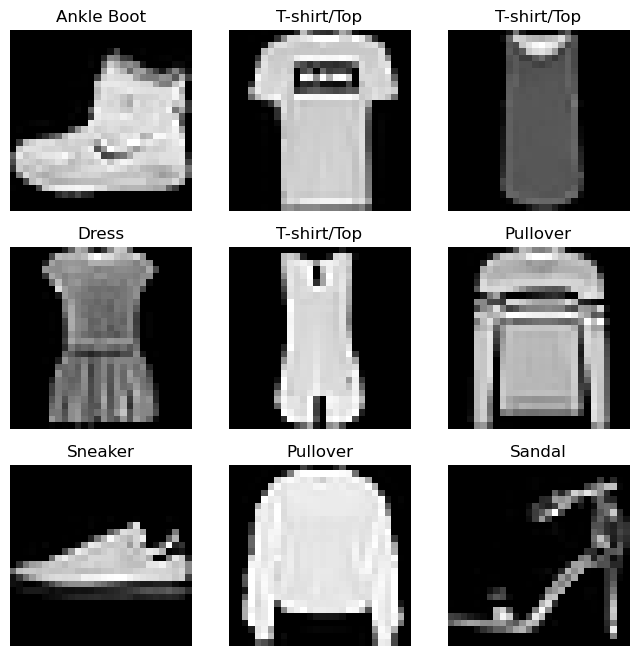

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

# Show some sample images
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

### Baseline Model (Simple Dense Network)

In [7]:
# Simple dense model
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.7841 - loss: 0.6181 - val_accuracy: 0.8356 - val_loss: 0.4571
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.8636 - loss: 0.3781 - val_accuracy: 0.8642 - val_loss: 0.3792
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.8766 - loss: 0.3374 - val_accuracy: 0.8655 - val_loss: 0.3774
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.8874 - loss: 0.3064 - val_accuracy: 0.8689 - val_loss: 0.3636
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.8915 - loss: 0.2935 - val_accuracy: 0.8608 - val_loss: 0.3870
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.8972 - loss: 0.2783 - val_accuracy: 0.8787 - val_loss: 0.3399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9010 - loss: 0.2657 - val_accuracy: 0.8790 - val_loss: 0.3337
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9060 -

### Overfitting Check

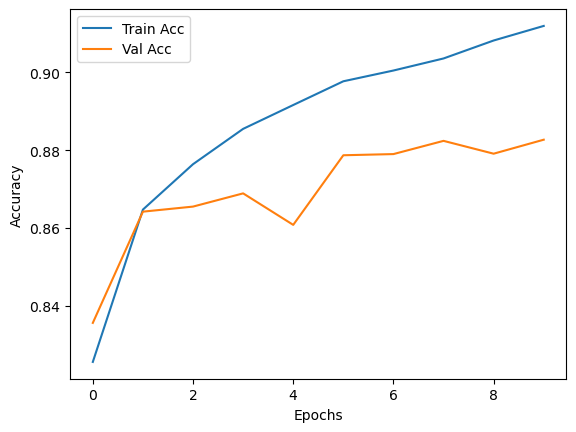

In [10]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Regularization (Dropout + L2)

In [15]:
reg_model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

reg_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

reg_history = reg_model.fit(x_train, y_train, epochs=15,
                            validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7127 - loss: 1.1420 - val_accuracy: 0.8374 - val_loss: 0.6365
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8170 - loss: 0.6757 - val_accuracy: 0.8343 - val_loss: 0.6030
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8211 - loss: 0.6313 - val_accuracy: 0.8343 - val_loss: 0.5785
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8243 - loss: 0.6092 - val_accuracy: 0.8334 - val_loss: 0.5672
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8284 - loss: 0.6041 - val_accuracy: 0.8331 - val_loss: 0.5519
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8275 - loss: 0.5967 - val_accuracy: 0.8393 - val_loss: 0.5481
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8282 - loss: 0.5896 - val_accuracy: 0.8371 - val_loss: 0.5519
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8311 - loss: 0.5885 - 

### CNN Model (Better for Images)

In [18]:
cnn_model = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

cnn_history = cnn_model.fit(x_train, y_train, epochs=10,
                            validation_data=(x_test, y_test))

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7606 - loss: 0.6555 - val_accuracy: 0.8656 - val_loss: 0.3678
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8733 - loss: 0.3450 - val_accuracy: 0.8884 - val_loss: 0.3086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8885 - loss: 0.2996 - val_accuracy: 0.9005 - val_loss: 0.2791
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8989 - loss: 0.2711 - val_accuracy: 0.9010 - val_loss: 0.2759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9042 - loss: 0.2513 - val_accuracy: 0.9053 - val_loss: 0.2573
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9153 - loss: 0.2290 - val_accuracy: 0.9077 - val_loss: 0.2477
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9183 - loss: 0.2186 - val_accuracy: 0.9092 - val_loss: 0.2496
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9241 - loss: 0.2032 - val

### Evaluate Model

In [21]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9141 - loss: 0.2380

Test accuracy: 0.9140999913215637


### Predictions on Test Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


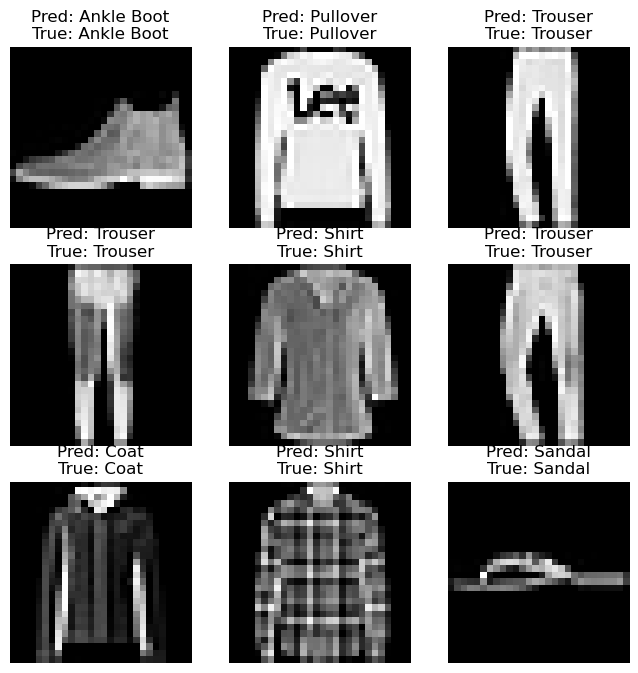

In [24]:
import numpy as np

predictions = cnn_model.predict(x_test)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap="gray")
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.show()